## Capstone #1

<div class="span5 alert alert-info">

### *File Descriptions*


* DATA_ELEMENT_DESCRIPTION.csv defines each data element and indicates where its description is found in Data Sources, Definitions, and Notes.
* DEFINED_DATA_VALUE.csv defines the meaning of specific values (such as missing or suppressed data). 
* DEMOGRAPHICS.csv identifies the data elements and values in the Demographics indicator domain.
* HEALTHY_PEOPLE_2010.csv identifies the Healthy People 2010 Targets and the U.S. Percentages or Rates.
* LEADING_CAUSES_OF_DEATH.csv identifies the data elements and values in the Leading Causes of Death indicator domain.
* MEASURES_OF_BIRTH_AND_DEATH.csv identifies the data elements and values in the Measures of Birth and Death indicator domain.
* PREVENTIVE_SERVICES_USE.csv identifies the data elements and values in the Preventive Services indicator domain.
* RELATIVE_HEALTH_IMPORTANCE.csv identifies the data elements and values in the Relative Health Importance indicator domain.
* RISK_FACTORS_AND_ACCESS_TO_CARE.csv identifies the data elements and values in the Risk Factors and Access to Care indicator domain.
* SUMMARY_MEASURES_OF_HEALTH.csv identifies the data elements and values in the Summary Measures of Health indicator domain.
* VULNERABLE_POPS_AND_ENV_HEALTH.csv identifies the data elements and values in the Vulnerable Populations and Environmental Health indicator domain.


    
Data source can be found [here](https://healthdata.gov/dataset/community-health-status-indicators-chsi-combat-obesity-heart-disease-and-cancer/resource)



In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.pyplot import figaspect
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import seaborn as sns
mpl.rcParams.update({'font.size': 14})


In [2]:
#Reading all 11 csv files
files = sorted(glob.glob('../CHSI_dataset/*.csv'))  

### *File Initialization*

In [3]:
DATA_ELEMENT_DESCRIPTION = pd.read_csv(files[0])
DEFINED_DATA_VALUE = pd.read_csv(files[1])
DEMOGRAPHICS = pd.read_csv(files[2])
HEALTHY_PEOPLE_2010 = pd.read_csv(files[3])
LEADING_CAUSES_OF_DEATH = pd.read_csv(files[4])
MEASURES_OF_BIRTH_AND_DEATH = pd.read_csv(files[5])
PREVENTIVE_SERVICES_USE = pd.read_csv(files[6])
RELATIVE_HEALTH_IMPORTANCE = pd.read_csv(files[7])
RISK_FACTORS_AND_ACCESS_TO_CARE = pd.read_csv(files[8])
SUMMARY_MEASURES_OF_HEALTH = pd.read_csv(files[9])
VULNERABLE_POPS_AND_ENV_HEALTH = pd.read_csv(files[10])

In [4]:
#Auxiliary files 
DATA_ELEMENT_DESCRIPTION
DEFINED_DATA_VALUE
HEALTHY_PEOPLE_2010

,Categories,Elements,US_Pct_or_Rate_2003,Healthy_People_2010_Target
0,Birth Measures,Low Birth Wt. (<2500 g),7.9,5.0
1,Birth Measures,Very Low Birth Wt. (<1500 g),1.4,0.9
2,Birth Measures,Premature Births (<37 weeks),12.3,7.6
3,Birth Measures,Births to Women under 18,3.4,-9998.9
4,Birth Measures,Births to Women over 40,2.6,-9998.9
5,Birth Measures,Births to Unmarried Women,34.6,-9998.9
6,Birth Measures,No Care in First Trimester,16.0,10.0
7,Infant Mortality,Infant Mortality,6.8,4.5
8,Infant Mortality,White non Hispanic Infant Mortality,5.7,4.5
9,Infant Mortality,Black non Hispanic Infant Mortality,13.6,4.5


In [5]:
LEADING_CAUSES_OF_DEATH.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,A_Wh_Comp,CI_Min_A_Wh_Comp,CI_Max_A_Wh_Comp,A_Bl_Comp,...,F_Bl_Cancer,CI_Min_F_Bl_Cancer,CI_Max_F_Bl_Cancer,F_Ot_Cancer,CI_Min_F_Ot_Cancer,CI_Max_F_Ot_Cancer,F_Hi_Cancer,CI_Min_F_Hi_Cancer,CI_Max_F_Hi_Cancer,LCD_Time_Span
0,1,1,Autauga,Alabama,AL,29,-1111,-1111,-1111,-1111,...,19,14,23,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003
1,1,3,Baldwin,Alabama,AL,16,57,39,75,-1111,...,20,15,25,-1111,-1111,-1111,-1111,-1111,-1111,2001-2003
2,1,5,Barbour,Alabama,AL,51,-1111,-1111,-1111,-1111,...,26,22,31,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003
3,1,7,Bibb,Alabama,AL,42,-1111,-1111,-1111,-1111,...,20,14,25,-1111,-1111,-1111,-1111,-1111,-1111,1994-2003
4,1,9,Blount,Alabama,AL,28,34,17,52,-1111,...,28,10,46,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003


In [6]:
#Outlier column name
DATA_ELEMENT_DESCRIPTION.update(
    DATA_ELEMENT_DESCRIPTION.replace('C_Ot_homicide','C_Ot_Homicide'))
LEADING_CAUSES_OF_DEATH.rename(columns={'C_Ot_homicide':'C_Ot_Homicide'}, inplace=True)

#Functions to describe acronyms
def description(param):
    if param in list(DATA_ELEMENT_DESCRIPTION.COLUMN_NAME):
        description_value = DATA_ELEMENT_DESCRIPTION[DATA_ELEMENT_DESCRIPTION.
                                     COLUMN_NAME==param].DESCRIPTION.tolist()[0]
    else:
        description_value = ''   
    return description_value

def short_description(param):
    list_of_removing = ['County data,', 'death measures,', 'birth measures,', ',']
    result = description(param)
    for i in list_of_removing:
        if result.__contains__(i):
            result = result.replace(i,'')
    return result

def short_race_description(param):
    list_of_removing = ['Black', 'Hispanic','White', 'other', 
                        'County data,', 'death measures,', 'birth measures,', ',']
    result = description(param)
    for i in list_of_removing:
        if result.__contains__(i):
            result = result.replace(i,'')
    return result

In [7]:
#Common columns in all worksheets
county_info = ['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
               'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number']


In [8]:
#Joining files
worksheets = [DEMOGRAPHICS,
LEADING_CAUSES_OF_DEATH,
MEASURES_OF_BIRTH_AND_DEATH, 
PREVENTIVE_SERVICES_USE,
RELATIVE_HEALTH_IMPORTANCE,
RISK_FACTORS_AND_ACCESS_TO_CARE,
SUMMARY_MEASURES_OF_HEALTH,
VULNERABLE_POPS_AND_ENV_HEALTH]


In [9]:
#Replacing not available/reported data by zeros
nan_values = [-1111, -1111.1, -1, -9999, -2222, -2222.2, -2]
for worksheet in worksheets:
    nda =[]
    for i,nan_value in enumerate(nan_values):
        nda.append(worksheet.loc[:,:]!=nan_value)
        worksheet.update(worksheet.where(nda[i]).fillna(0))        

In [10]:
#Time dependent data should be identified and normalized
time_dependent_worksheets = [LEADING_CAUSES_OF_DEATH,
MEASURES_OF_BIRTH_AND_DEATH,
PREVENTIVE_SERVICES_USE,
VULNERABLE_POPS_AND_ENV_HEALTH]


time_spans = ['1994-2003', '1999-2003', '2001-2003']
time_span_convert = [7,4,2]
for worksheet in time_dependent_worksheets:
    for i in list(worksheet.columns):
        if i.__contains__('Time_Span'):
            worksheet[i].replace(time_spans, time_span_convert, inplace=True)
            worksheet.rename(columns={i: 'Time'}, inplace=True)

for worksheet in time_dependent_worksheets:
    for i in list(worksheet.columns):
        if worksheet.columns.get_loc(i) < worksheet.columns.get_loc('Time') and i not in county_info:
            worksheet[i]=worksheet[i]/worksheet['Time']
          

In [11]:
#Merging all clean data files
df = worksheets[0]
for name in worksheets[1:]:
    df = df.merge(name, on=county_info.append('Time'), how='outer', sort=True).fillna(0)

In [12]:
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Strata_Determining_Factors,Number_Counties,Population_Size,Min_Population_Size,...,Shig_Rpt,Shig_Rpt_Ind,Shig_Exp,Toxic_Chem,Carbon_Monoxide_Ind,Nitrogen_Dioxide_Ind,Sulfur_Dioxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind
0,1,1,Autauga,Alabama,AL,29,"frontier status, population size, poverty, age",37,48612,28447,...,1.000000,0.750000,2.750000,720799.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
1,1,3,Baldwin,Alabama,AL,16,"frontier status, population size, poverty, age",27,162586,118395,...,20.500000,2.000000,6.500000,17832.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000
2,1,5,Barbour,Alabama,AL,51,"frontier status, population size, poverty, age...",33,28414,27269,...,0.250000,0.750000,4.000000,12468.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
3,1,7,Bibb,Alabama,AL,42,"frontier status, population size, poverty, age",53,21516,8134,...,0.428571,0.428571,2.285714,1043.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
4,1,9,Blount,Alabama,AL,28,"frontier status, population size, poverty, age",39,55725,29009,...,2.750000,1.000000,1.250000,222255.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000


<div class="span5 alert alert-info">

### *Redundant columns*

In [13]:
observation = list(df.columns)
description_list = [description(i) for i in observation]
def observ_keyword(variable):
    results = []
    for i, j in enumerate(description_list):
        if variable in str(j):
            results.append(observation[i])
    return results

In [14]:
filter_percentile = list(description(i) for i in list(observ_keyword('percentile')))
filter_CI = list(description(i) for i in list(observ_keyword('Confidence interval'))) 
filter_fav = list(description(i) for i in list(observ_keyword('Favorable indicator')))

filters = list(observ_keyword('Favorable indicator') 
               + observ_keyword('Confidence interval') 
               + observ_keyword('percentile'))
df = df.drop(columns=filters)

In [15]:
#Neutral columns
for i in list(df.columns):
    if len(np.unique(df[i]))==1 and i!='D_Ot_HIV':
        df=df.drop(columns=i)
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Strata_Determining_Factors,Number_Counties,Population_Size,Population_Density,...,Salm_Exp,Shig_Rpt,Shig_Exp,Toxic_Chem,Carbon_Monoxide_Ind,Nitrogen_Dioxide_Ind,Sulfur_Dioxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind
0,1,1,Autauga,Alabama,AL,29,"frontier status, population size, poverty, age",37,48612,82.0,...,7.750000,1.000000,2.750000,720799.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
1,1,3,Baldwin,Alabama,AL,16,"frontier status, population size, poverty, age",27,162586,102.0,...,33.500000,20.500000,6.500000,17832.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000
2,1,5,Barbour,Alabama,AL,51,"frontier status, population size, poverty, age...",33,28414,32.0,...,7.250000,0.250000,4.000000,12468.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
3,1,7,Bibb,Alabama,AL,42,"frontier status, population size, poverty, age",53,21516,35.0,...,4.571429,0.428571,2.285714,1043.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
4,1,9,Blount,Alabama,AL,28,"frontier status, population size, poverty, age",39,55725,86.0,...,7.750000,2.750000,1.250000,222255.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
State_FIPS_Code,3141.0,30.304680,1.513442e+01,1.000000,18.000000,29.000000,45.000000,5.600000e+01
County_FIPS_Code,3141.0,103.716651,1.079995e+02,1.000000,35.000000,79.000000,133.000000,8.400000e+02
Strata_ID_Number,3141.0,44.696275,2.511843e+01,1.000000,23.000000,44.000000,66.000000,8.800000e+01
Number_Counties,3141.0,38.486151,1.029019e+01,15.000000,32.000000,37.000000,45.000000,6.200000e+01
Population_Size,3141.0,94368.164279,3.064317e+05,62.000000,11211.000000,25235.000000,64040.000000,9.935475e+06
Population_Density,3141.0,249.826807,1.702476e+03,0.000000,17.000000,44.000000,109.000000,6.939000e+04
Poverty,3141.0,13.345909,4.888337e+00,0.000000,9.800000,12.600000,16.200000,3.620000e+01
Age_19_Under,3141.0,24.806527,3.281777e+00,1.400000,22.700000,24.600000,26.400000,4.720000e+01
Age_19_64,3141.0,60.289398,3.356056e+00,47.600000,58.300000,60.300000,62.300000,8.330000e+01
Age_65_84,3141.0,12.789430,3.334035e+00,2.100000,10.700000,12.500000,14.700000,2.920000e+01


<div class="span5 alert alert-info">
    
### *Demographics Map*
    
To visualize the health indices throughout the country, I merge the map shapefile and data to us_merge dataframes. Because Alaska and Hawaii are further away and out of proportion I merged them separately. US_plot function creates the US map with any numeric variables in the data --default color is blue.

In [17]:
us_map = gpd.read_file('../US-map/UScounties.shp')
us_map_land = us_map[ (us_map['STATE_NAME']!='Alaska') 
                     &(us_map['STATE_NAME']!='Hawaii')]
us_map_Alaska = us_map[us_map['STATE_NAME']=='Alaska']
us_map_Hawaii = us_map[us_map['STATE_NAME']=='Hawaii']

#Merging map and data:
df_land = us_map_land.set_index('NAME').join(df.set_index('CHSI_County_Name'))
df_Alaska = us_map_Alaska.set_index('NAME').join(df.set_index('CHSI_County_Name'))
df_Hawaii = us_map_Hawaii.set_index('NAME').join(df.set_index('CHSI_County_Name'))

In [18]:
def min_max_col(variable):
    minimum = min(df_land[variable].min(), 
              df_Alaska[variable].min(), df_Hawaii[variable].min())
    maximum = max(df_land[variable].max(), 
              df_Alaska[variable].max(), df_Hawaii[variable].max())
    return minimum, maximum

def US_plot(variable, color='Blues'):
    h, w = figaspect(1.)
    mn, mx = min_max_col(variable)
    fig, ax1 = plt.subplots(1, figsize=(w*10, h*10))
    ax1.axis('off')
    ax1.set_title(description(variable), fontsize=40)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='2%', pad=0.1)
    cax.tick_params(labelsize=25)
    df_land.plot(column=variable, cmap=color,
                        linewidth=0.8, ax=ax1,
                        edgecolor='0.8', vmin=mn ,vmax=mx,
                        legend=True, cax=cax)

    
    left, bottom, width, height = [0.15, 0.22, 0.24, 0.3] 
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.axis('off')
    ax2.set_title('Alaska', fontsize=25)
    df_Alaska.plot(column=variable, cmap=color, vmin=mn ,vmax=mx,
                          linewidth=0.8, ax=ax2, edgecolor='0.6')
    
    left, bottom, width, height = [0.35, 0.3, 0.2, 0.05]
    ax3 = fig.add_axes([left, bottom, width, height])
    ax3.axis('off')
    ax3.set_title('Hawaii', fontsize=25)
    df_Hawaii.plot(column =variable, cmap=color, vmin=mn ,vmax=mx,
                          linewidth=0.8, ax=ax3, edgecolor='0.6')

In [19]:
list(description(i) for i in df.columns)

['Two-digit state identifier, developed by the National Bureau of Standards',
 'Three-digit county identifier, developed by the National Bureau of Standards',
 'Name of county',
 'Name of State or District of Columbia',
 'Two-character postal abbreviation for state name',
 'CHSI Peer County Stratum Number',
 'Listing of strata factors',
 'Number of peer counties',
 'County data, population size',
 'County data, population density (people per square mile)',
 'County data, individuals living below poverty level',
 'County data, population under age 19',
 'County data, population age 19-64',
 'County data, population age 65-84',
 'County data, population age 85+',
 'County data, White',
 'County data, Black',
 'County data, American Indian',
 'County data, Asian/Pacific Islander',
 'County data, Hispanic origin',
 'County data, under age 1, complications of pregnancy/birth, White',
 'County data, under age 1, complications of pregnancy/birth, Black',
 'County data, under age 1, complicati

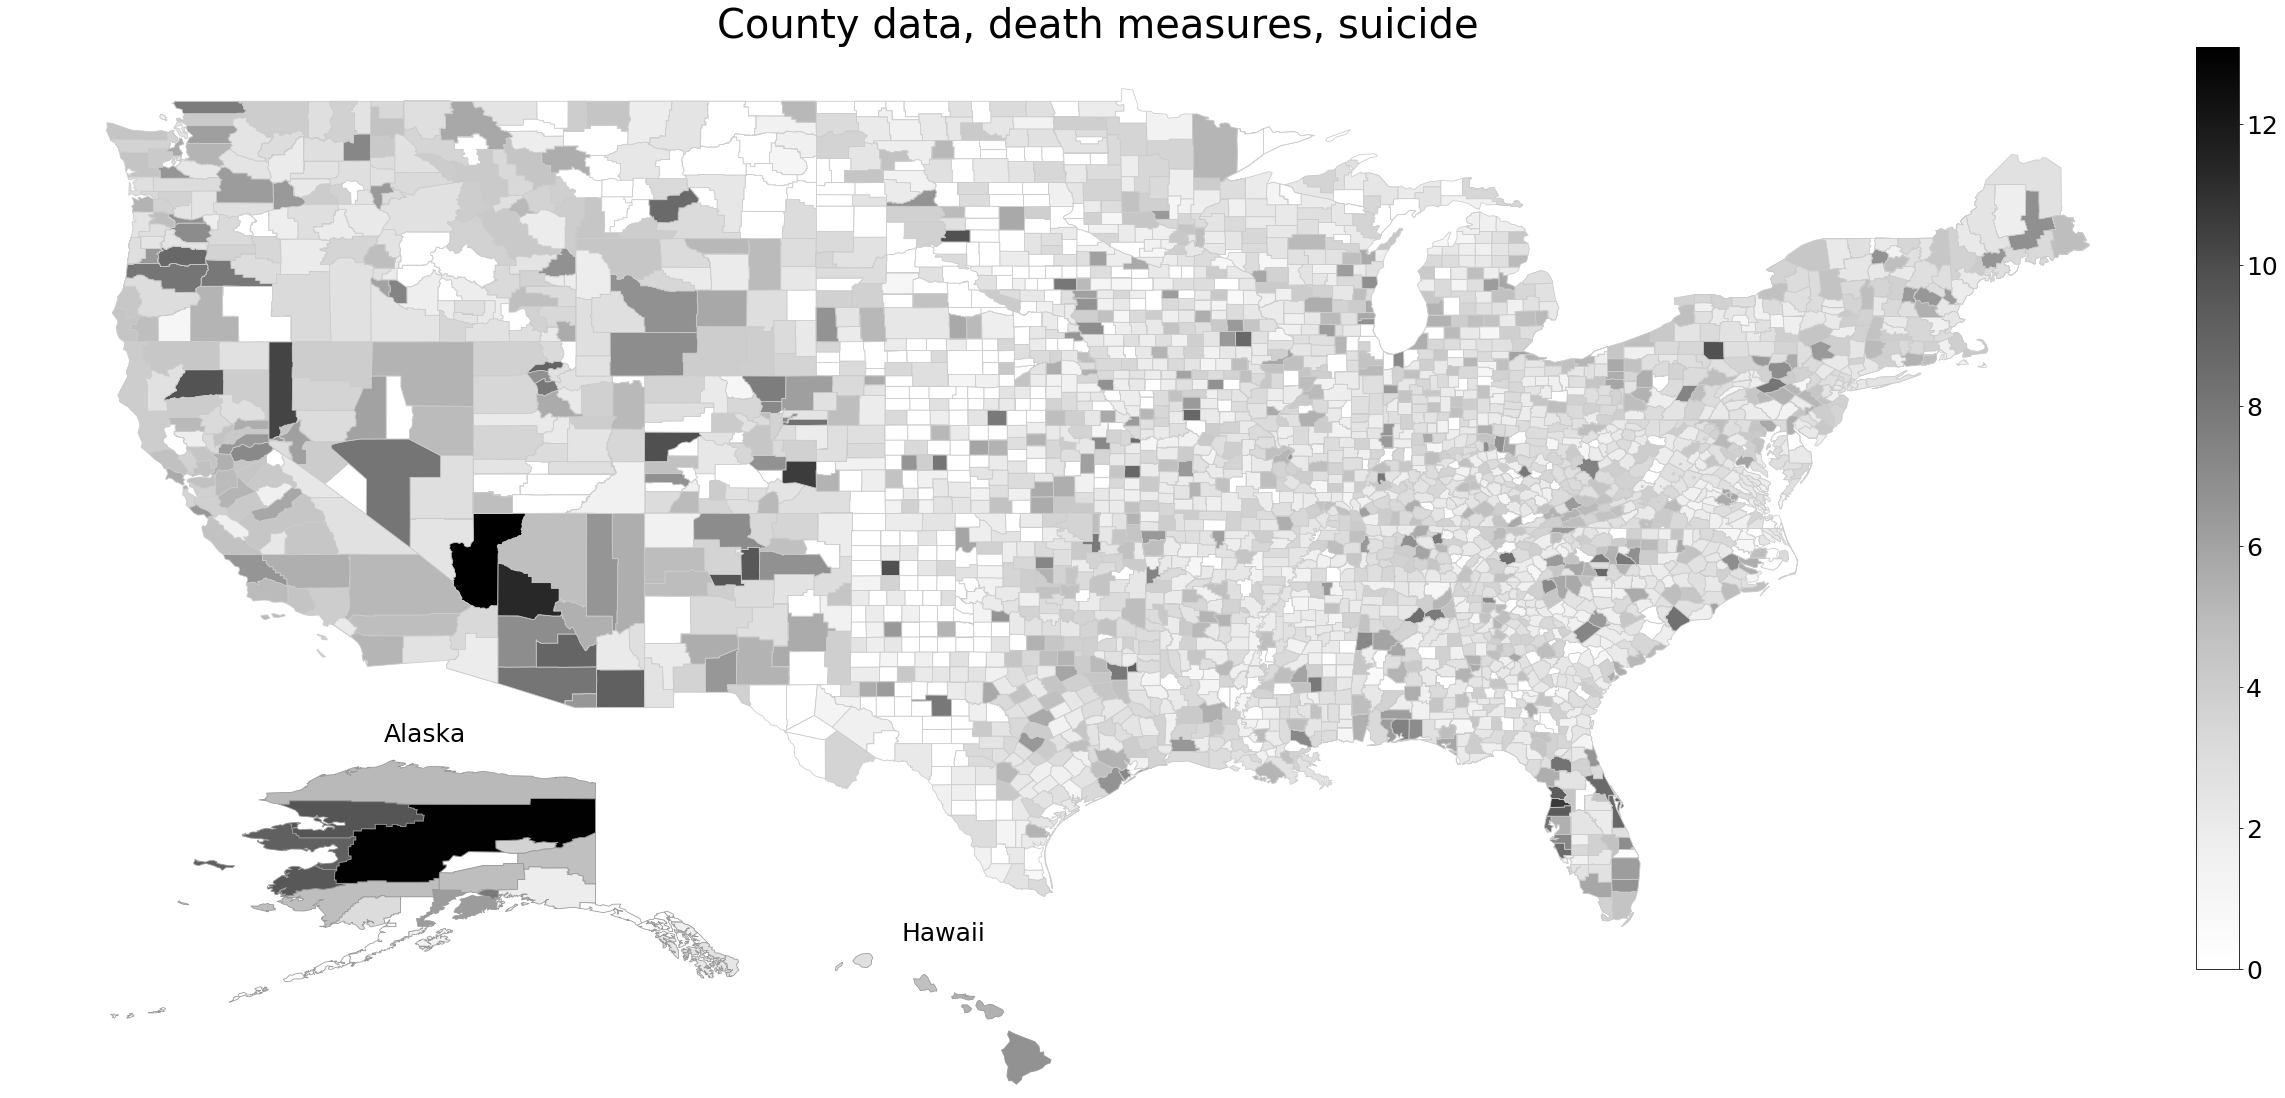

In [20]:
US_plot('Suicide', 'Greys')

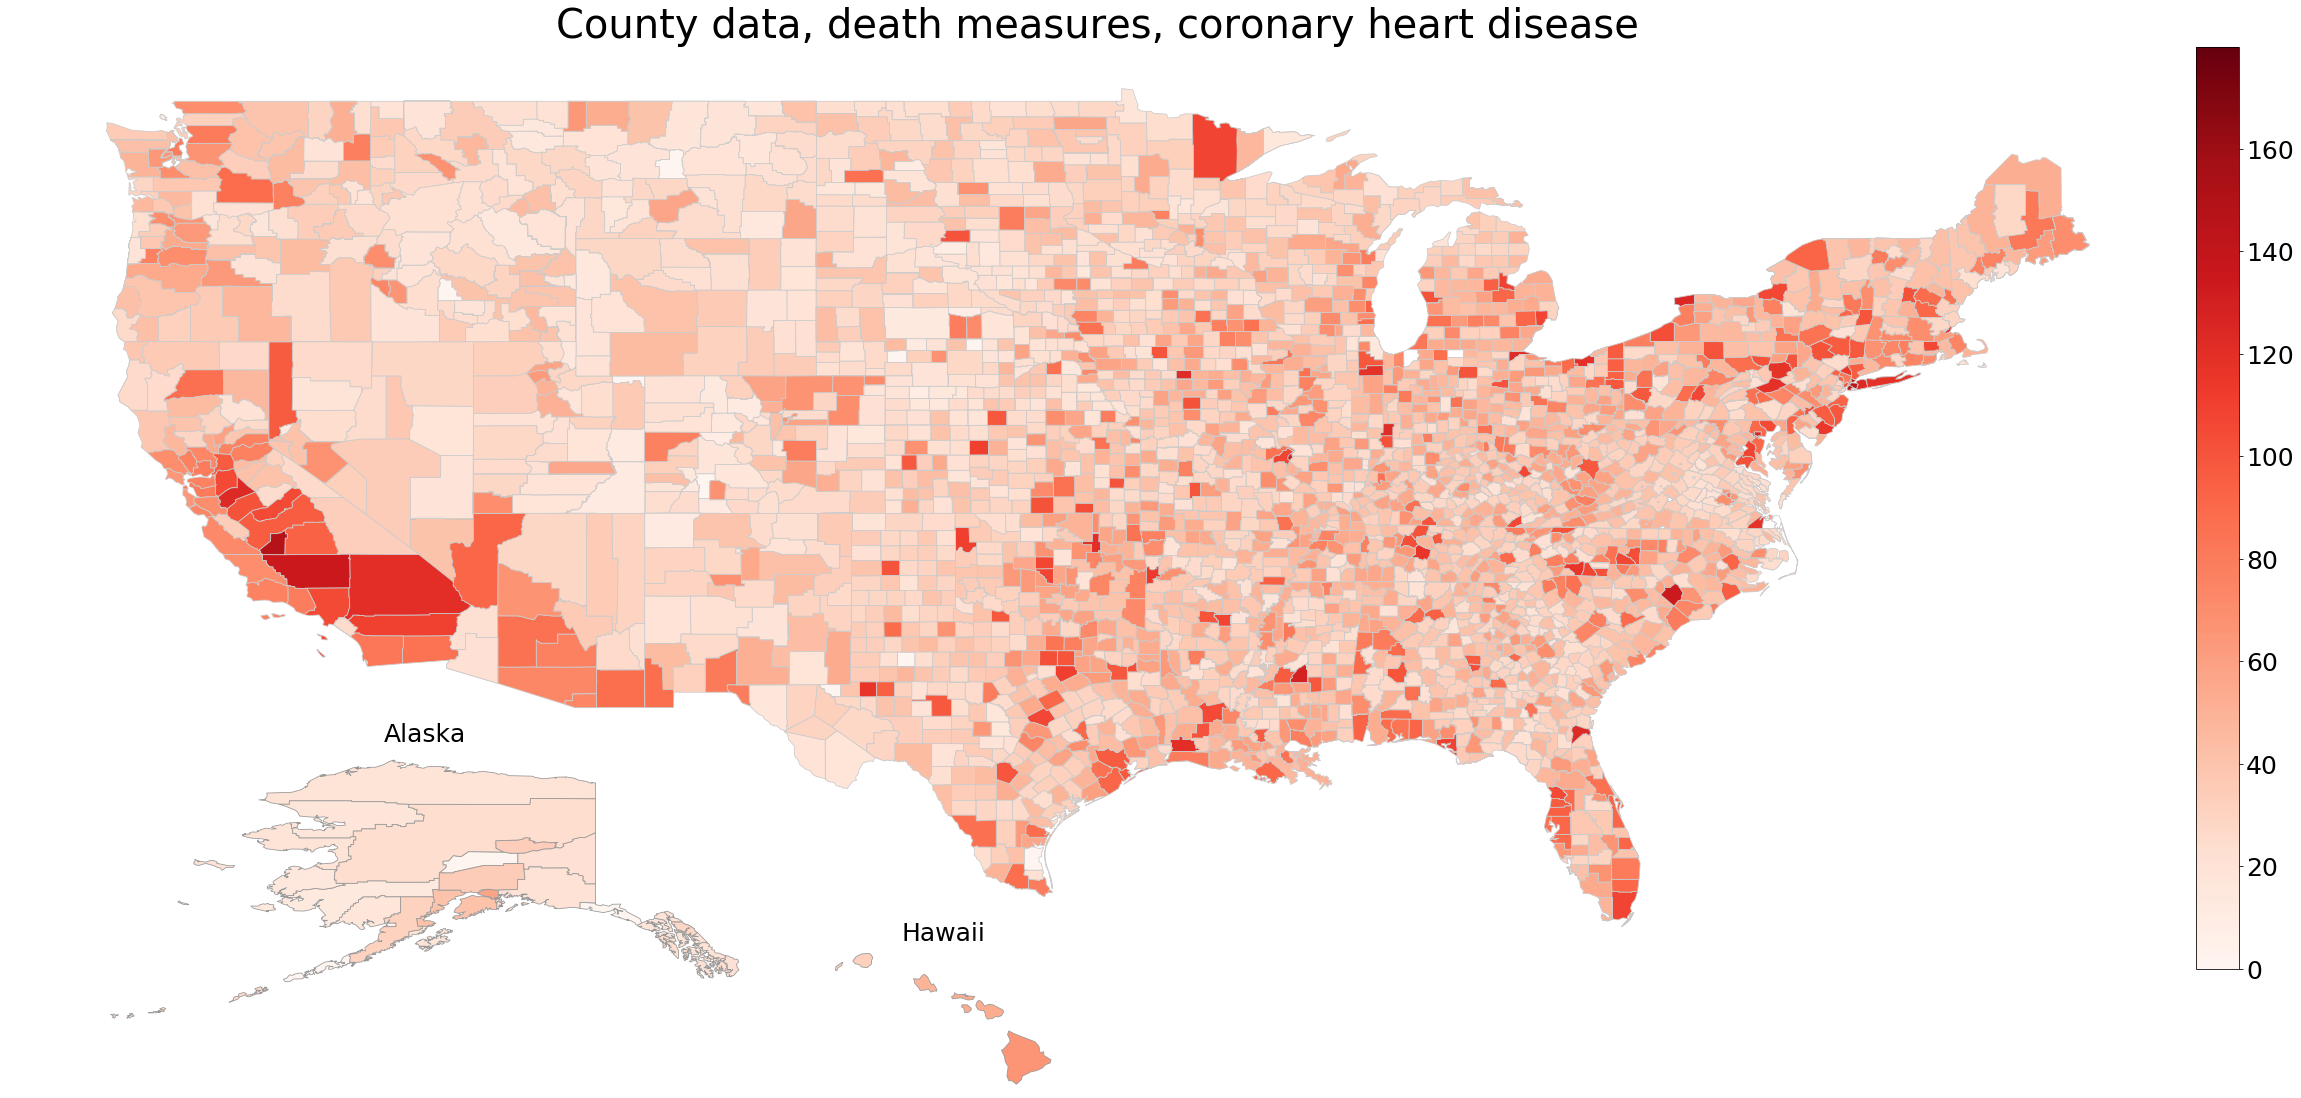

In [21]:
US_plot('CHD', 'Reds')